# SVM

In [1]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns

import pandas as pd
import numpy as np

import sys
sys.path.append('..')

from util.helpers import id2label, labels

In [2]:
df = pd.read_csv('../../dataset/nou_hearings.csv')


In [3]:
df["label"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [4]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [5]:
vector = TfidfVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

In [7]:
# SVM
svm = SVC(C = 1, gamma="scale", kernel="linear", random_state=42)



In [8]:
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [9]:
y_pred = svm.predict(X_test)

y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy_score(y_test, y_pred))

0.6639344262295082


                        precision    recall  f1-score   support

       Interessegruppe       0.00      0.00      0.00         1
 Offentlig forvaltning       0.75      0.41      0.53        98
               Bedrift       0.82      0.21      0.33        67
          Privatperson       0.59      0.91      0.72       225
        Politisk parti       0.77      0.68      0.72       110
Frivillig organisasjon       0.80      0.41      0.55        29
 Akademisk institusjon       0.71      0.75      0.73        80

              accuracy                           0.66       610
             macro avg       0.64      0.48      0.51       610
          weighted avg       0.70      0.66      0.64       610



c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

<Axes: >

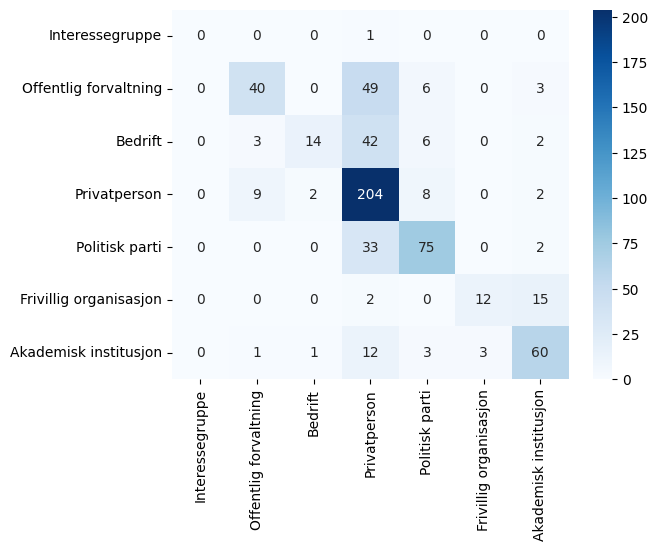

In [10]:



y_test = [id2label(y) for y in y_test]
# Flatten list
y_pred = y_pred.flatten()

y_pred = [id2label(y) for y in y_pred]

label = labels()

#Classification report
print(classification_report(y_test, y_pred, target_names=label))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)

## SVM with count vectorizer

In [11]:
vector = CountVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# SVM
svm = SVC(kernel="linear", C=0.1, gamma="scale", random_state=42)

"""grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)"""


'grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, verbose=2)\n\ngrid_search.fit(X_train, y_train)\n\nprint(grid_search.best_params_)'

In [13]:
svm.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

In [14]:
y_pred = svm.predict(X_test)

y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy_score(y_test, y_pred))

0.6147540983606558


                        precision    recall  f1-score   support

       Interessegruppe       0.00      0.00      0.00         1
 Offentlig forvaltning       0.54      0.46      0.50        98
               Bedrift       0.43      0.18      0.25        67
          Privatperson       0.58      0.79      0.67       225
        Politisk parti       0.73      0.65      0.69       110
Frivillig organisasjon       0.74      0.48      0.58        29
 Akademisk institusjon       0.71      0.69      0.70        80

              accuracy                           0.61       610
             macro avg       0.53      0.46      0.48       610
          weighted avg       0.61      0.61      0.60       610



c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

<Axes: >

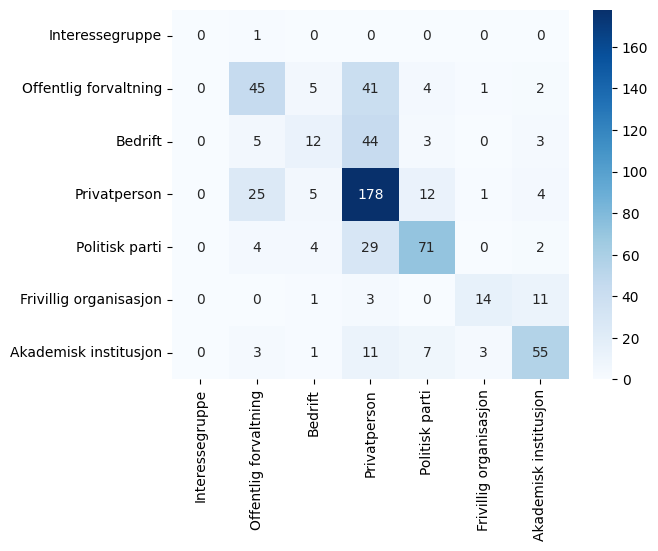

In [15]:
# Convert ids to labels

y_test = [id2label(y) for y in y_test]
# Flatten list
y_pred = y_pred.flatten()

y_pred = [id2label(y) for y in y_pred]

label = labels()

# Classification report
print(classification_report(y_test, y_pred, target_names=label))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)

## SVM with word2vec

In [16]:
import spacy
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [17]:
nlp = spacy.load('nb_core_news_md')

# Tokenize the text
def preprocess_text(text):
    
    doc = nlp(text.lower())
    tokens = [token.text for token in doc]
    return tokens

tokenized_docs = [preprocess_text(doc) for doc in df["text"]]

tagged_docs = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(tokenized_docs)]

model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=40)
model.build_vocab(tagged_docs)
model.train(tagged_docs, total_examples=model.corpus_count, epochs=model.epochs)

In [18]:
doc_vectors = [model.infer_vector(doc) for doc in tokenized_docs]

In [19]:


from math import isnan


X = np.array(doc_vectors)
y = df["label"].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# SVM model

svm = SVC(kernel="linear", C=1, random_state=42)

svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [21]:
y_pred = svm.predict(X_test)

y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy_score(y_test, y_pred))

0.48032786885245904


In [22]:
# Convert ids to labels
def ids_to_labels(y, id2label):

    labels = [id2label[i] for i in np.array(y)]

    return labels

y_test = ids_to_labels(y_test, id2label)
# Flatten list
y_pred = y_pred.flatten()

y_pred = ids_to_labels(y_pred, id2label)

labels = list(id2label.values())

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)

TypeError: 'function' object is not subscriptable